In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
%cd E:\Project

E:\Project


In [2]:
columns_name = ['user_id','order_dt','order_product','order_amount']
df = pd.read_table('CDNOW_master.txt',names = columns_name,sep= '\s+')
df.head()

,user_id,order_dt,order_product,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


- 由上表得知，存在一個用戶在一天內多次購買商品。

In [3]:
df.describe()

,user_id,order_dt,order_product,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


- 1.訂單數量平均在2.4個左右，標準差在2.3左右，在75%分位數時購買量為3個，表示大部分客戶購買量都在2.5-3左右，只有少部分人有大量訂購的情形。
- 2.平均訂單價格在35左右，標準差在36左右，75%分位數時購買金額為43，表示大部分客戶購買金額都在35-40左右，只有少部分人有大量訂購的情形。

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        69659 non-null  int64  
 1   order_dt       69659 non-null  int64  
 2   order_product  69659 non-null  int64  
 3   order_amount   69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


- order_dt為，需要轉換為時間格式

In [5]:
df['order_date'] = pd.to_datetime(df['order_dt'],format ='%Y%m%d')

df['month'] = df['order_date'].values.astype('datetime64[M]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        69659 non-null  int64         
 1   order_dt       69659 non-null  int64         
 2   order_product  69659 non-null  int64         
 3   order_amount   69659 non-null  float64       
 4   order_date     69659 non-null  datetime64[ns]
 5   month          69659 non-null  datetime64[s] 
dtypes: datetime64[ns](1), datetime64[s](1), float64(1), int64(3)
memory usage: 3.2 MB


- 用戶整體趨勢消費分析
- 依照月份分析
    - 1.消費金額
    - 2.消費數量
    - 3.消費次數
    - 4.消費人數

In [6]:
#依照月份進行分組
df_groupby_month = df.groupby('month')

<Axes: title={'center': '每月消費人數'}, xlabel='month'>

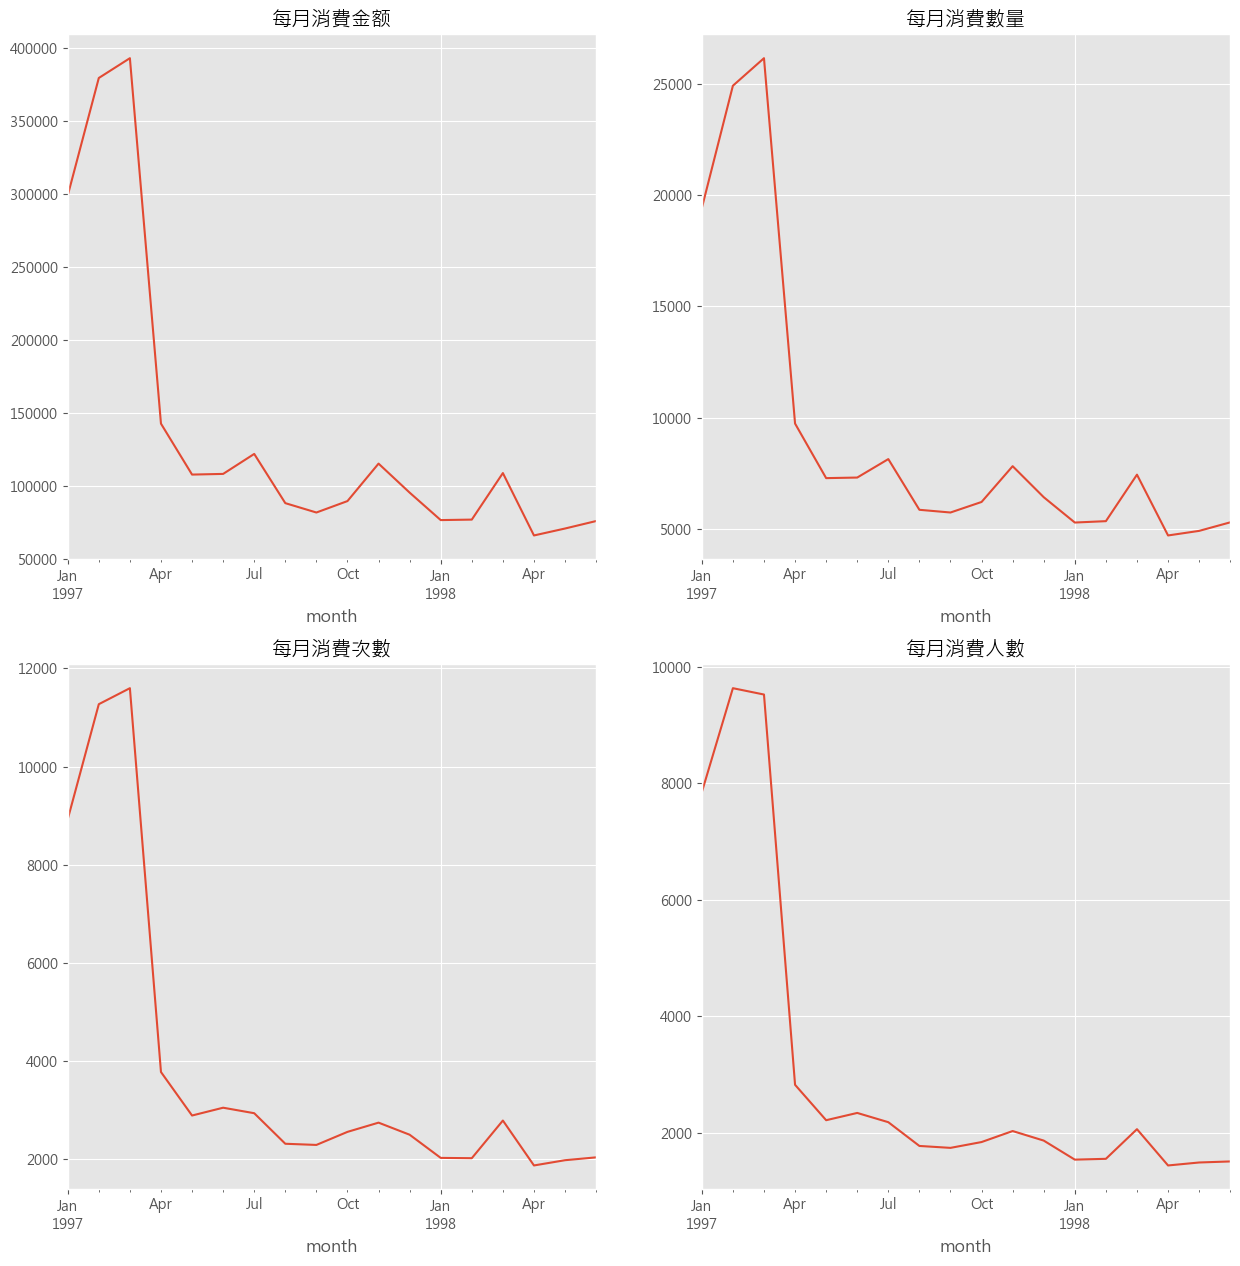

In [7]:
#每月消費金額
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].set_title('每月消費金额')
df_groupby_month['order_amount'].sum().plot(ax=axs[0, 0])
#每月消費數量
axs[0, 1].set_title('每月消費數量')
df_groupby_month.order_product.sum().plot(ax=axs[0, 1])
#每月消費次數
axs[1, 0].set_title('每月消費次數')
df_groupby_month.user_id.count().plot(ax=axs[1, 0])
#每月消費人數
axs[1, 1].set_title('每月消費人數')
df_groupby_month.user_id.apply(lambda x:len(x.drop_duplicates())).plot(ax=axs[1, 1])

- 上圖可以看出，前三個月的消費金额，消費數量，消費次數，消費人數都偏高；可能原因是促銷活動或者是以亞洲國家來說的農曆春節又或者是當年度前三個月推出了熱門曲目；接下來每三個月小幅度增長，可能每三個月推出新曲或者每三個月進行一次促銷。
- 消費金額可以看出，從四月份起消費金額回歸平穩，平均每月消費總額約7-8萬。

- 用戶個體分析
- 1.個體消費金額
- 2.個體消費數量
- 3.累積消費金額百分比分布


In [8]:
grouped_user = df.groupby('user_id')
grouped_order = grouped_user[['order_product','order_amount']]
grouped_order.sum().describe()

,order_product,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


- 平均每位用戶購買了7個產品，但中位數只有3個產品，表示大部分的客戶只購買了少量的產品，少部分用戶購買了大量產品拉高整體平均數。
- 平均消費金額為106，但中位數遠遠超過平均數為右偏分布，而在75分位數時為消費金額為106與平均相當，表示後25%的客戶消費金額存在高額消費的情況，拉高了平均值。


<Axes: xlabel='order_amount', ylabel='order_product'>

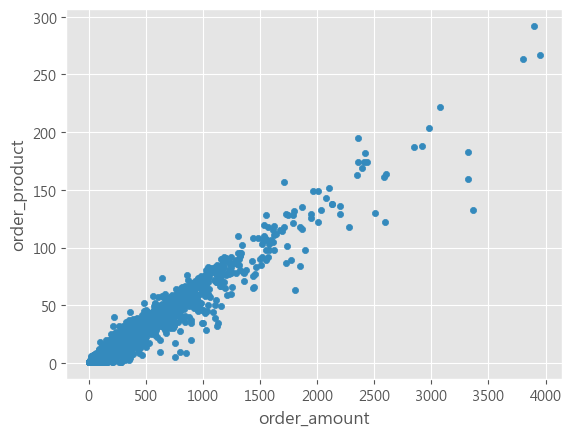

In [9]:
grouped_order.sum().query('order_amount<=4000').plot.scatter(x = 'order_amount',y = 'order_product' )

- 根據散點圖可以得出購買數量與消費金額呈現線性，並且可以根據交會點判斷出一個產品的客單價為15左右；少部分用戶大量購買可能會造成誤判，這部分根據消費金額大於4000的方式進行過濾(僅有11個資料點落在4000以外)。

<Axes: ylabel='Frequency'>

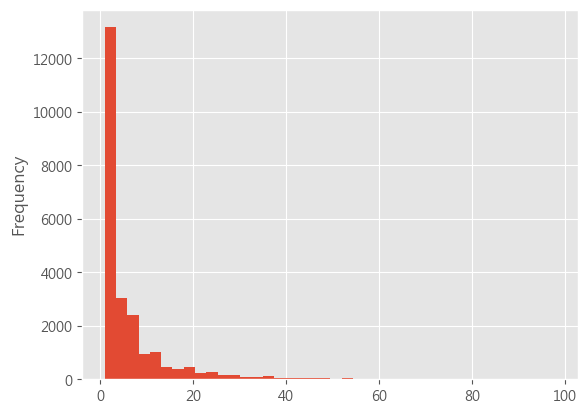

In [10]:
grouped_order.sum().query('order_product <= 100').order_product.plot.hist(bins = 40)

- 根據切比雪夫定理過濾出異常值(mean+-5*std)，從上圖可以看出大部分客戶都只購買了3-4個產品

[]

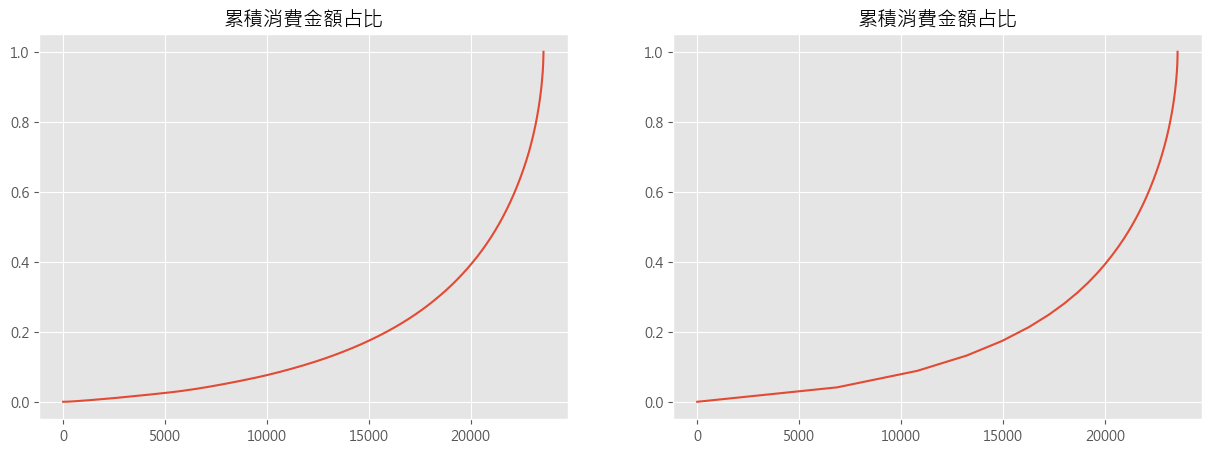

In [11]:
#累積消費金額占比
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
order_amount_sum = grouped_order.sum().sort_values('order_amount').apply(lambda x:x.cumsum()/x.sum())
axs[0].set_title('累積消費金額占比')
order_amount_sum.reset_index().order_amount.plot(ax=axs[0])
#累積消費數量占比
order_amount_sum = grouped_order.sum().sort_values('order_product').apply(lambda x:x.cumsum()/x.sum())
axs[1].set_title('累積消費金額占比')
order_amount_sum.reset_index().order_product.plot().plot(ax=axs[1])

- 累積消費金額占比與累積消費金額占比趨勢差不多，由圖可知50%的用戶貢獻了15%消費額度，而最後約5000位的用戶貢獻了60%的消費額度
# 總結:維持好最後的5000位用戶即可達成60%的業績。

# 3.用戶消費行為分析
- 用戶第一次消費(首購)
- 用戶最後一次消費
- 新老客消費比
    + 多少用戶只消費一次
    + 每月新客多少
- 用戶分層
    + RFM
    + 新、老、活躍、回流、流失
- 用戶購買週期(按訂單)
    + 用戶消費週期描述
    + 用戶消費週期分布
- 用戶生命週期
    + 用戶生命週期描述
    + 用戶生命周分布
    

<Axes: title={'center': '用戶最後一次消費'}, xlabel='order_date'>

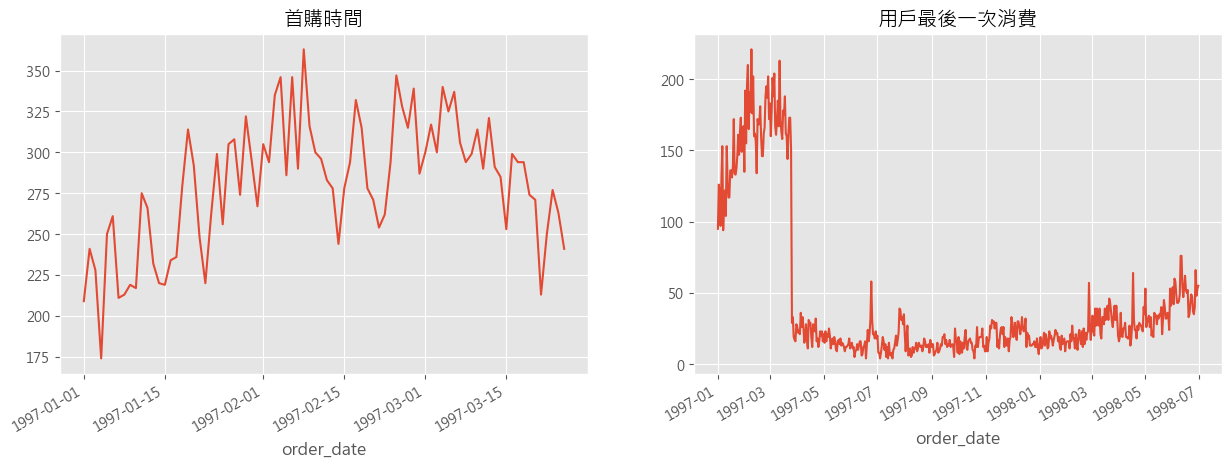

In [12]:
#首購
fig , axs = plt.subplots(1,2,figsize = (15,5))
axs[0].set_title('首購時間')
grouped_user.min().order_date.value_counts().plot(ax = axs[0])
#復購
axs[1].set_title('用戶最後一次消費')
grouped_user.max().order_date.value_counts().plot(ax = axs[1])

- 從上圖可得知幾乎所有用戶的首購集中在1997年的1月到1997年3月之間。
- 從用戶最後一次消費來看大部分人的都只購買了一次，且願意再次購買的客戶還有流失的情況。

In [13]:
#多少用戶只消費一次
user_life = grouped_user.order_date.agg(['min','max'])
(user_life['min'] ==  user_life['max']).value_counts().reset_index()

,index,count
0,True,12054
1,False,11516


- 最大時間等於最小時間表示第一次與最後一次消費時間相同，也就表示該客戶只消費了一次。
- 從上方數據可以得出，有12054名客戶只消費了一次占比約51%

# 用戶分層-RFM


In [14]:
rfm = df.pivot_table(index = 'user_id',values = ['order_date','order_product','order_amount'],
                     aggfunc = {'order_date':'max',
                                'order_product':'sum',
                                'order_amount':'sum'})
rfm

,order_amount,order_date,order_product
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29
...,...,...,...
23566,36.00,1997-03-25,2
23567,20.97,1997-03-25,1
23568,121.70,1997-04-22,6


In [15]:
rfm['R'] = -(rfm.order_date-rfm.order_date.max())/ np.timedelta64(1,'D')
rfm = rfm.rename(columns = {'order_amount':'M','order_product':'F'})
rfm

,M,order_date,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0
...,...,...,...,...
23566,36.00,1997-03-25,2,462.0
23567,20.97,1997-03-25,1,462.0
23568,121.70,1997-04-22,6,434.0


In [16]:
def rfm_func(x):
    level = x.apply(lambda x:'1' if x >= 0 else '0')
    lamba = level.R + level.F + level.M
    b = {
        '111':'重要價值客戶',
        '011':'重要保持客戶',
        '101':'重要挽留客戶',
        '001':'重要發展客戶',
        '110':'一般價值客戶',
        '010':'一般保持客戶',
        '100':'一般挽留用戶',
        '000':'一般發展客戶'}
    return b[lamba]
rfm['lamba'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis = 1)
rfm.head()

,M,order_date,F,R,lamba
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般挽留用戶
2,89.00,1997-01-12,6,534.0,一般挽留用戶
3,156.46,1998-05-28,16,33.0,重要保持客戶
4,100.50,1997-12-12,7,200.0,一般發展客戶
5,385.61,1998-01-03,29,178.0,重要保持客戶


In [17]:
rfm.groupby('lamba')[['R','F','M']].sum()

,R,F,M
lamba,,,
一般保持客戶,29448.0,1712,19937.45
一般價值客戶,36295.0,650,7181.28
一般挽留用戶,6951815.0,29346,438291.81
一般發展客戶,591108.0,13977,196971.23
重要保持客戶,517267.0,107789,1592039.62
重要價值客戶,358363.0,11121,167080.83
重要挽留客戶,114482.0,1263,33028.40
重要發展客戶,56636.0,2023,45785.01


<Axes: xlabel='F', ylabel='R'>

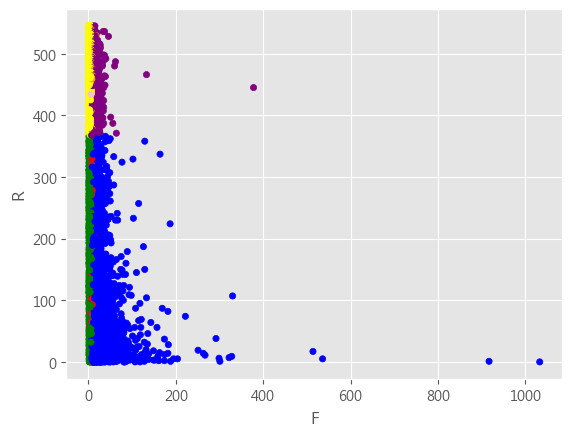

In [18]:
color_mapping = {
    '一般保持客戶': 'Red',
    '一般價值客戶': 'Orange',
    '一般挽留用戶': 'Yellow',
    '一般發展客戶': 'Green',
    '重要保持客戶': 'Blue',
    '重要價值客戶': 'Purple',
    '重要挽留客戶': 'Pink',
    '重要發展客戶': 'Brown'
}
rfm['color'] = rfm['lamba'].map(color_mapping)
rfm.plot.scatter('F','R',c = rfm.color)

- 從散點圖中可以看出來重要保持客戶佔據了大多數，為基數最大的族群。

# 用戶分層-新、老、活躍、回流、流失

In [19]:
v = df.pivot_table(values='order_date',
                               columns='month',
                               index ='user_id',
                               aggfunc='count').fillna(0)
df_buy = pivoed_columns.map(lambda x: 1 if x > 0 else 0)
df_buy

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
def active_status(x):
    status = []
    for i in range(18):
        if x.iloc[i] == 0:  
            if len(status) > 0:
                if status[i - 1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unctive')
            else:
                status.append('unreg')
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i - 1] == 'unctive':
                    status.append('return')
                elif status[i - 1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status,df_buy.columns)

df_buy_ct = df_buy.apply(active_status, axis=1)


In [21]:
df_buy_ct.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive
2,new,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive,unctive
3,new,unctive,return,active,unctive,unctive,unctive,unctive,unctive,unctive,return,unctive,unctive,unctive,unctive,unctive,return,unctive
4,new,unctive,unctive,unctive,unctive,unctive,unctive,return,unctive,unctive,unctive,return,unctive,unctive,unctive,unctive,unctive,unctive
5,new,active,unctive,return,active,active,active,unctive,return,unctive,unctive,return,active,unctive,unctive,unctive,unctive,unctive


In [22]:
df_buy_ct2 = df_buy_ct.replace('unreg',np.NAN).apply(lambda x:pd.Series.value_counts(x))
df_buy_ct2

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unctive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


<Axes: xlabel='month'>

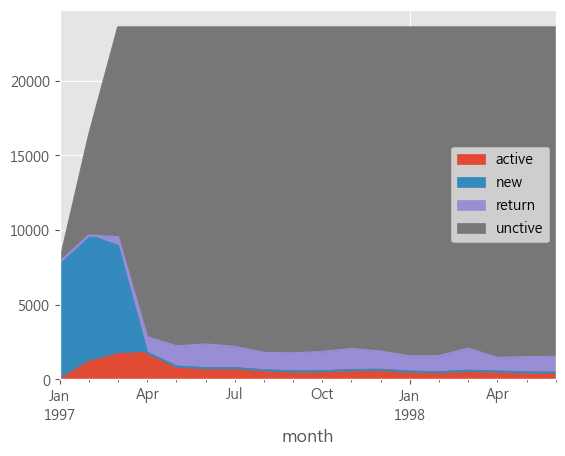

In [23]:
df_buy_ct2.fillna(0).T.plot.area()

- 1.從面積圖可以看出，新用戶註冊都在前三個月，但之後都沒有新用戶的加入，對後期營收造成影響。
- 2.前三個月後，可能由於營銷策略或者是產品需求達到了滿足狀態，造成大部分用戶都只消費了一次，但後續回流用戶保留在一個穩定的區間，表示產品成有一定量的需求，可以在此區段加大營銷力度。
- 3.活躍用戶數量一直保持穩定的數量，可以穩定維持。

In [24]:
df_buy_ct2.fillna(0).T.apply(lambda x:x/x.sum(),axis = 1)

,active,new,return,unctive
month,,,,
1997-01-01,0.000000,1.000000,0.000000,0.000000
1997-02-01,0.070886,0.519299,0.000000,0.409815
1997-03-01,0.071319,0.307510,0.025244,0.595927
1997-04-01,0.075223,0.000000,0.044506,0.880272
1997-05-01,0.036148,0.000000,0.057785,0.906067
1997-06-01,0.031693,0.000000,0.067543,0.900764
1997-07-01,0.031650,0.000000,0.060840,0.907510
1997-08-01,0.025626,0.000000,0.049555,0.924820
1997-09-01,0.022401,0.000000,0.051379,0.926220


# 用戶購買週期

In [ ]:
order_diff = grouped_user.apply(lambda x:x.order_date-x.order_date.shift())
order_diff.describe()

In [ ]:
(order_diff/np.timedelta64(1,'D')).hist(bins = 20)

- 大部分用戶購買週期都不長，約落在100天內。
- 訂單週期呈現指數分布。
- 平均用戶購買時間為68天。

# 用戶生命週期

In [ ]:
(user_life['max']-user_life['min']).describe()

<Axes: >

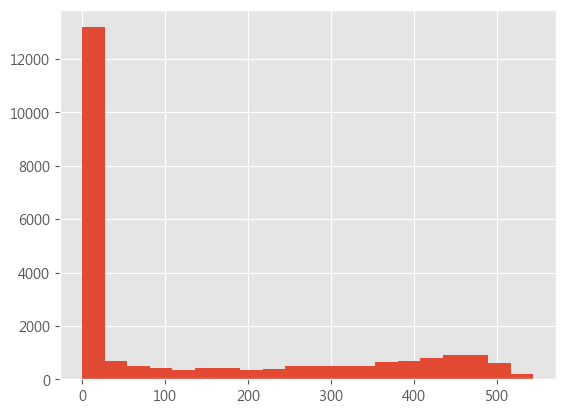

In [28]:
((user_life['max']-user_life['min'])/np.timedelta64(1,'D')).hist(bins = 20)

- 平均用戶第一次購買與最後一次購買的週期為134天，但中位數為0天表示有一定程度的客戶只夠買了一次再次驗證了多少約有51%客戶只購買了一次。(可以排除)


<Axes: >

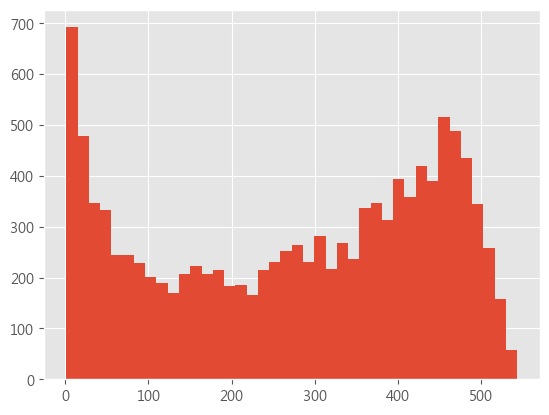

In [29]:
user_life_1 = ((user_life['max']-user_life['min'])/np.timedelta64(1,'D'))
user_life_1[user_life_1>0].hist(bins = 40)

- 排除掉只消費一次的客戶後，還是有相當多的客戶生命週期非常短暫，排除掉這部分後，還是有相當多的用戶生命週期為300-500天還是相當的穩定。

# 回購率&復購率

### 回購率

<Axes: xlabel='month'>

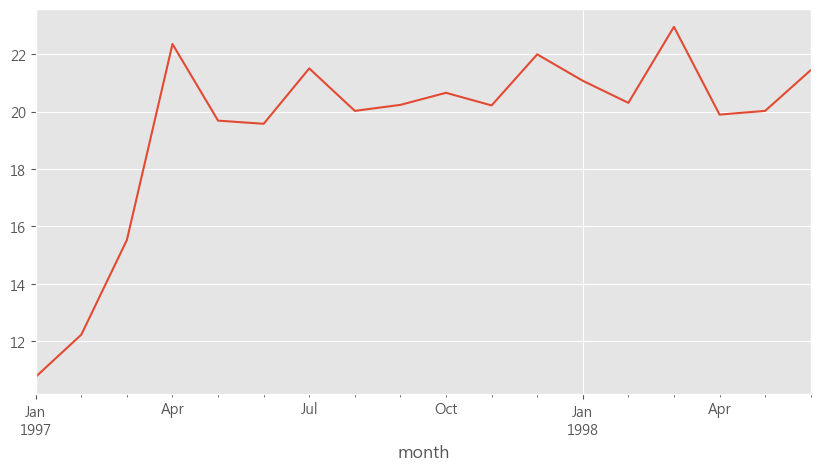

In [131]:
Repeat_Purchase = pivoed_columns.map(lambda x :1 if x > 1 else np.NAN  if x == 0 else 0)
round((Repeat_Purchase.sum()/Repeat_Purchase .count())*100,2).plot(figsize = (10,5))

- 前三個月，大量新用戶湧入而大部分都只購買了一次，造成回購率較低，後續回購率回歸平穩，落在了20%左右。

### 復購率

In [114]:
def Repurchase(x):
    R = []
    for i in range(17):
        if x.iloc[i] == 1:
            
            if x.iloc[i+1] == 1:
                R.append(1)
                
            elif x.iloc[i+1] == 0:
                R.append(0)
        else:
            R.append(np.NAN)
        
    R.append(np.NAN)
    return pd.Series(R,pivoed_columns.columns)
Repurchase_1 = df_buy.apply(Repurchase,axis = 1) 

In [128]:
Repurchase_1

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='month'>

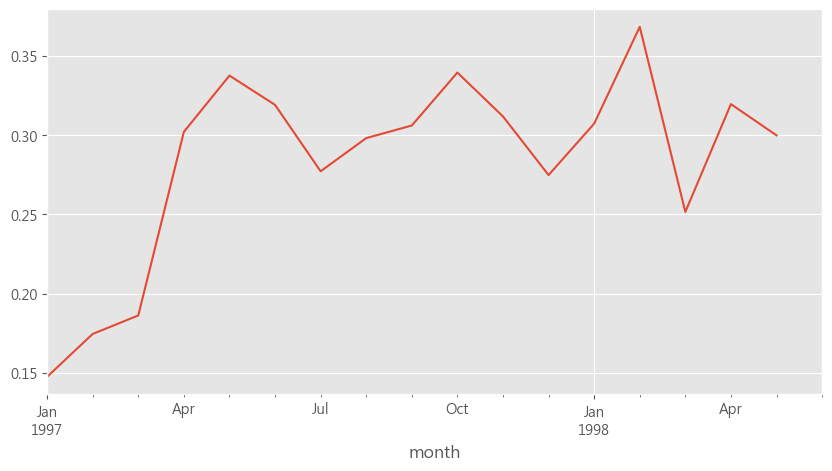

In [130]:
(Repurchase_1.sum()/Repurchase_1.count()).plot(figsize = (10,5))

- 前三個月為新用戶增長期，且大部分用戶都只消費了一次，造成了回購率沒有明顯的上升。
- 後續月份雖然總購買人數減少，但大部分客戶都有持續的回購造成了回購率穩定但總購買人數下降的現象。

In [132]:
Repurchase_1.count(),Repurchase_1.sum()

(month
 1997-01-01    7846
 1997-02-01    9633
 1997-03-01    9524
 1997-04-01    2822
 1997-05-01    2214
 1997-06-01    2339
 1997-07-01    2180
 1997-08-01    1772
 1997-09-01    1739
 1997-10-01    1839
 1997-11-01    2028
 1997-12-01    1864
 1998-01-01    1537
 1998-02-01    1551
 1998-03-01    2060
 1998-04-01    1437
 1998-05-01    1488
 1998-06-01       0
 dtype: int64,
 month
 1997-01-01    1157.0
 1997-02-01    1681.0
 1997-03-01    1773.0
 1997-04-01     852.0
 1997-05-01     747.0
 1997-06-01     746.0
 1997-07-01     604.0
 1997-08-01     528.0
 1997-09-01     532.0
 1997-10-01     624.0
 1997-11-01     632.0
 1997-12-01     512.0
 1998-01-01     472.0
 1998-02-01     571.0
 1998-03-01     518.0
 1998-04-01     459.0
 1998-05-01     446.0
 1998-06-01       0.0
 dtype: float64)

SyntaxError: invalid syntax (557260259.py, line 1)